<a href="https://colab.research.google.com/github/pratyushk27/AI-Model-for-Loan-Repayment-Prediction/blob/main/Building_an_AI_Model_for_Loan_Repayment_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount our google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization



Load bank_data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/loan_data.csv")
data.head(4)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0


In [4]:
data.shape

(9578, 14)

In [5]:
bank_data=data.drop(columns=['purpose'])
bank_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


shape of bank_data

In [6]:
bank_data.shape

(9578, 13)

Information about data

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 972.9 KB


statistical info

In [8]:
bank_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [10]:
bank_data.isnull().sum()                    # checking missing value

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
# lets create 2 dataframes: one with fully_paid and other is not_fully paid.

fully_paid = bank_data[bank_data['not.fully.paid'] == 1].copy()
not_fully_paid = bank_data[bank_data['not.fully.paid'] == 0].copy()

In [12]:
fully_paid.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,1533.0,0.661448,0.473372,0.000000,0.000000,1.000000,1.000000,1.000000e+00
int.rate,1533.0,0.132452,0.025495,0.070500,0.115400,0.131600,0.148200,2.164000e-01
installment,1533.0,342.785114,223.948527,15.910000,168.640000,287.310000,491.300000,9.268300e+02
log.annual.inc,1533.0,10.885023,0.666718,7.600902,10.491274,10.878047,11.276633,1.345884e+01
dti,1533.0,13.195838,7.006769,0.000000,7.830000,13.340000,18.830000,2.996000e+01
fico,1533.0,697.828441,33.756808,617.000000,672.000000,692.000000,717.000000,8.220000e+02
days.with.cr.line,1533.0,4393.541259,2431.785491,180.041667,2759.958333,4050.000000,5580.041667,1.569200e+04
revol.bal,1533.0,21066.293542,49905.689359,0.000000,3323.000000,8850.000000,20616.000000,1.207359e+06
revol.util,1533.0,52.255075,29.057906,0.000000,29.900000,53.900000,77.000000,1.065000e+02
inq.last.6mths,1533.0,2.330724,2.933480,0.000000,0.000000,1.000000,3.000000,3.300000e+01


In [13]:
not_fully_paid.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,8045.0,0.832318,0.373607,0.000000,1.000000,1.000000,1.00000,1.000000
int.rate,8045.0,0.120770,0.026692,0.060000,0.099600,0.121800,0.13870,0.212100
installment,8045.0,314.574123,203.398688,15.670000,162.250000,266.520000,423.95000,940.140000
log.annual.inc,8045.0,10.941091,0.604045,7.547502,10.584056,10.933178,11.30472,14.528354
dti,8045.0,12.494413,6.855020,0.000000,7.120000,12.530000,17.80000,29.950000
fico,8045.0,713.326911,38.223723,612.000000,682.000000,707.000000,742.00000,827.000000
days.with.cr.line,8045.0,4592.632624,2508.035500,178.958333,2820.041667,4140.041667,5760.00000,17639.958330
revol.bal,8045.0,16122.724425,29637.645740,0.000000,3171.000000,8535.000000,17905.00000,952013.000000
revol.util,8045.0,45.759608,28.891285,0.000000,21.400000,44.800000,69.80000,119.000000
inq.last.6mths,8045.0,1.433934,1.999009,0.000000,0.000000,1.000000,2.00000,31.000000


<Axes: xlabel='not.fully.paid', ylabel='count'>

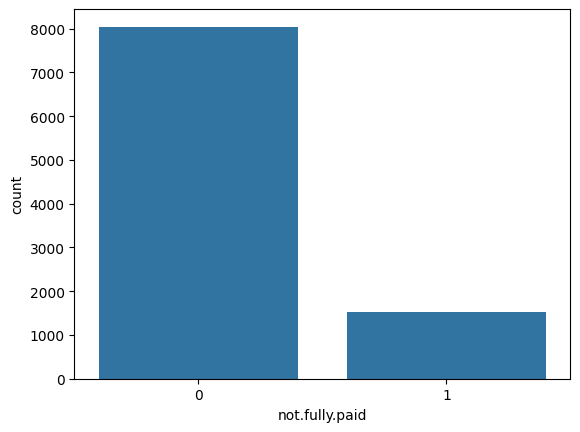

In [14]:
sns.countplot(data=bank_data, x='not.fully.paid')

Bank_Data Visualization

<Axes: xlabel='inq.last.6mths', ylabel='Count'>

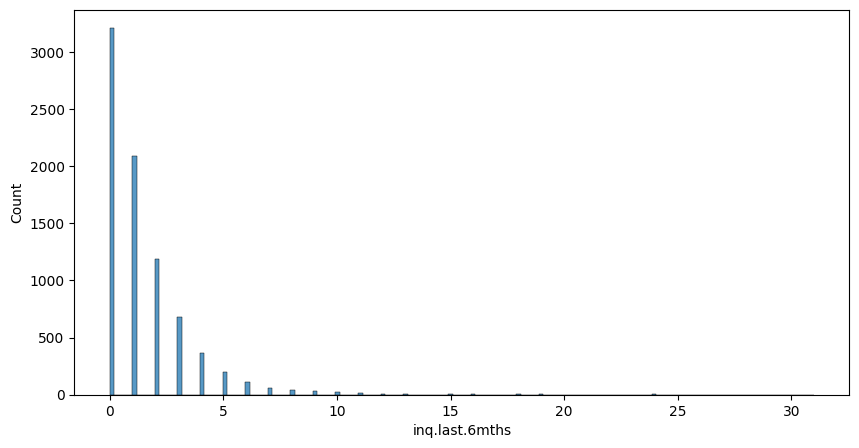

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(not_fully_paid["inq.last.6mths"])

<Axes: xlabel='installment', ylabel='Count'>

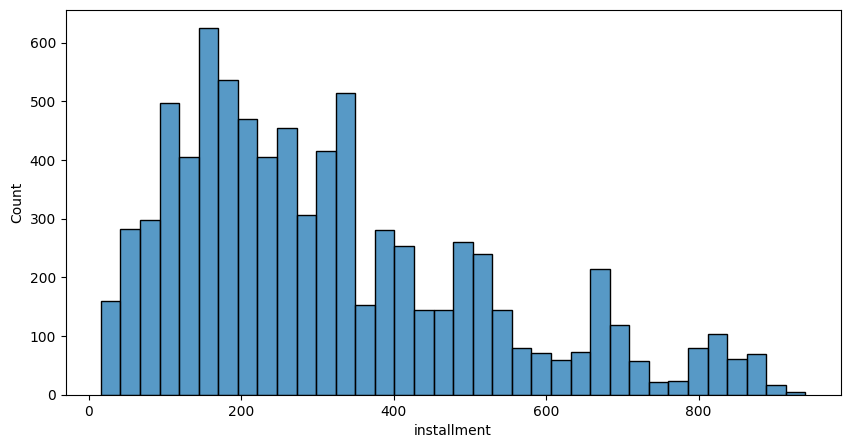

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(not_fully_paid["installment"])

<Axes: xlabel='log.annual.inc', ylabel='Count'>

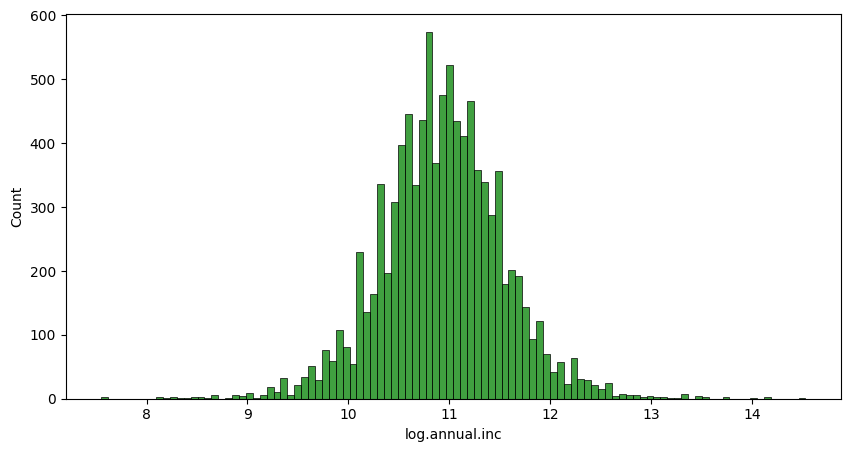

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(bank_data["log.annual.inc"],color='green')

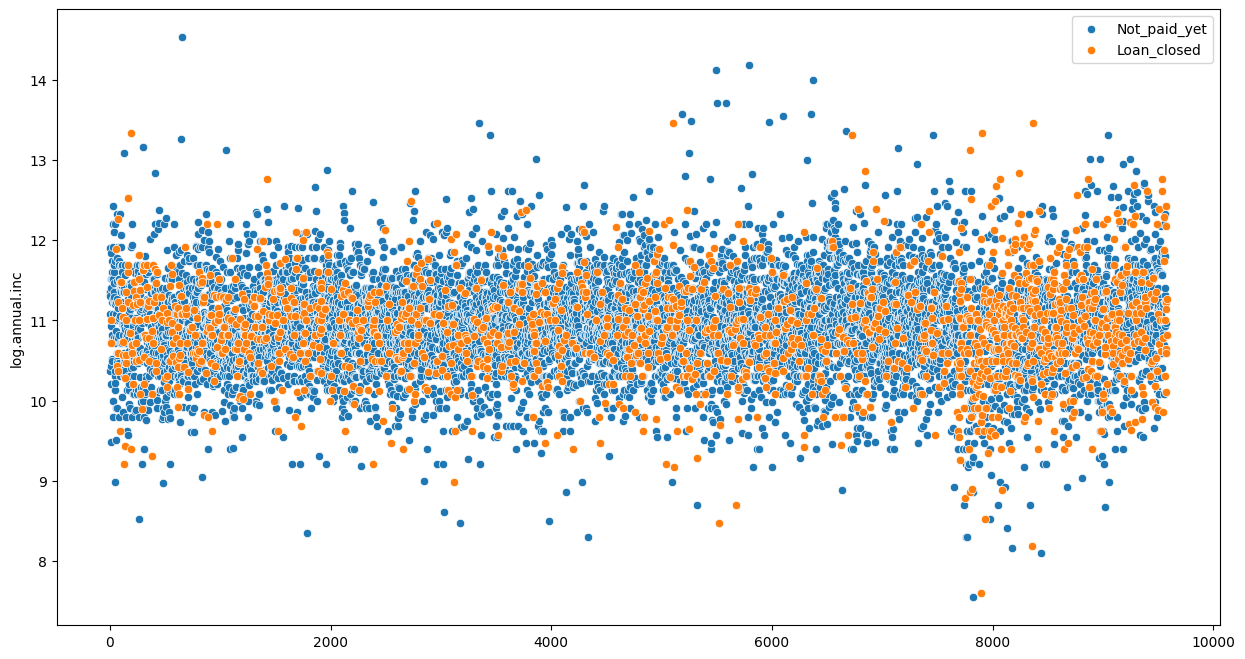

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(not_fully_paid["log.annual.inc"], label='Not_paid_yet')
sns.scatterplot(fully_paid["log.annual.inc"], label='Loan_closed')
plt.legend()

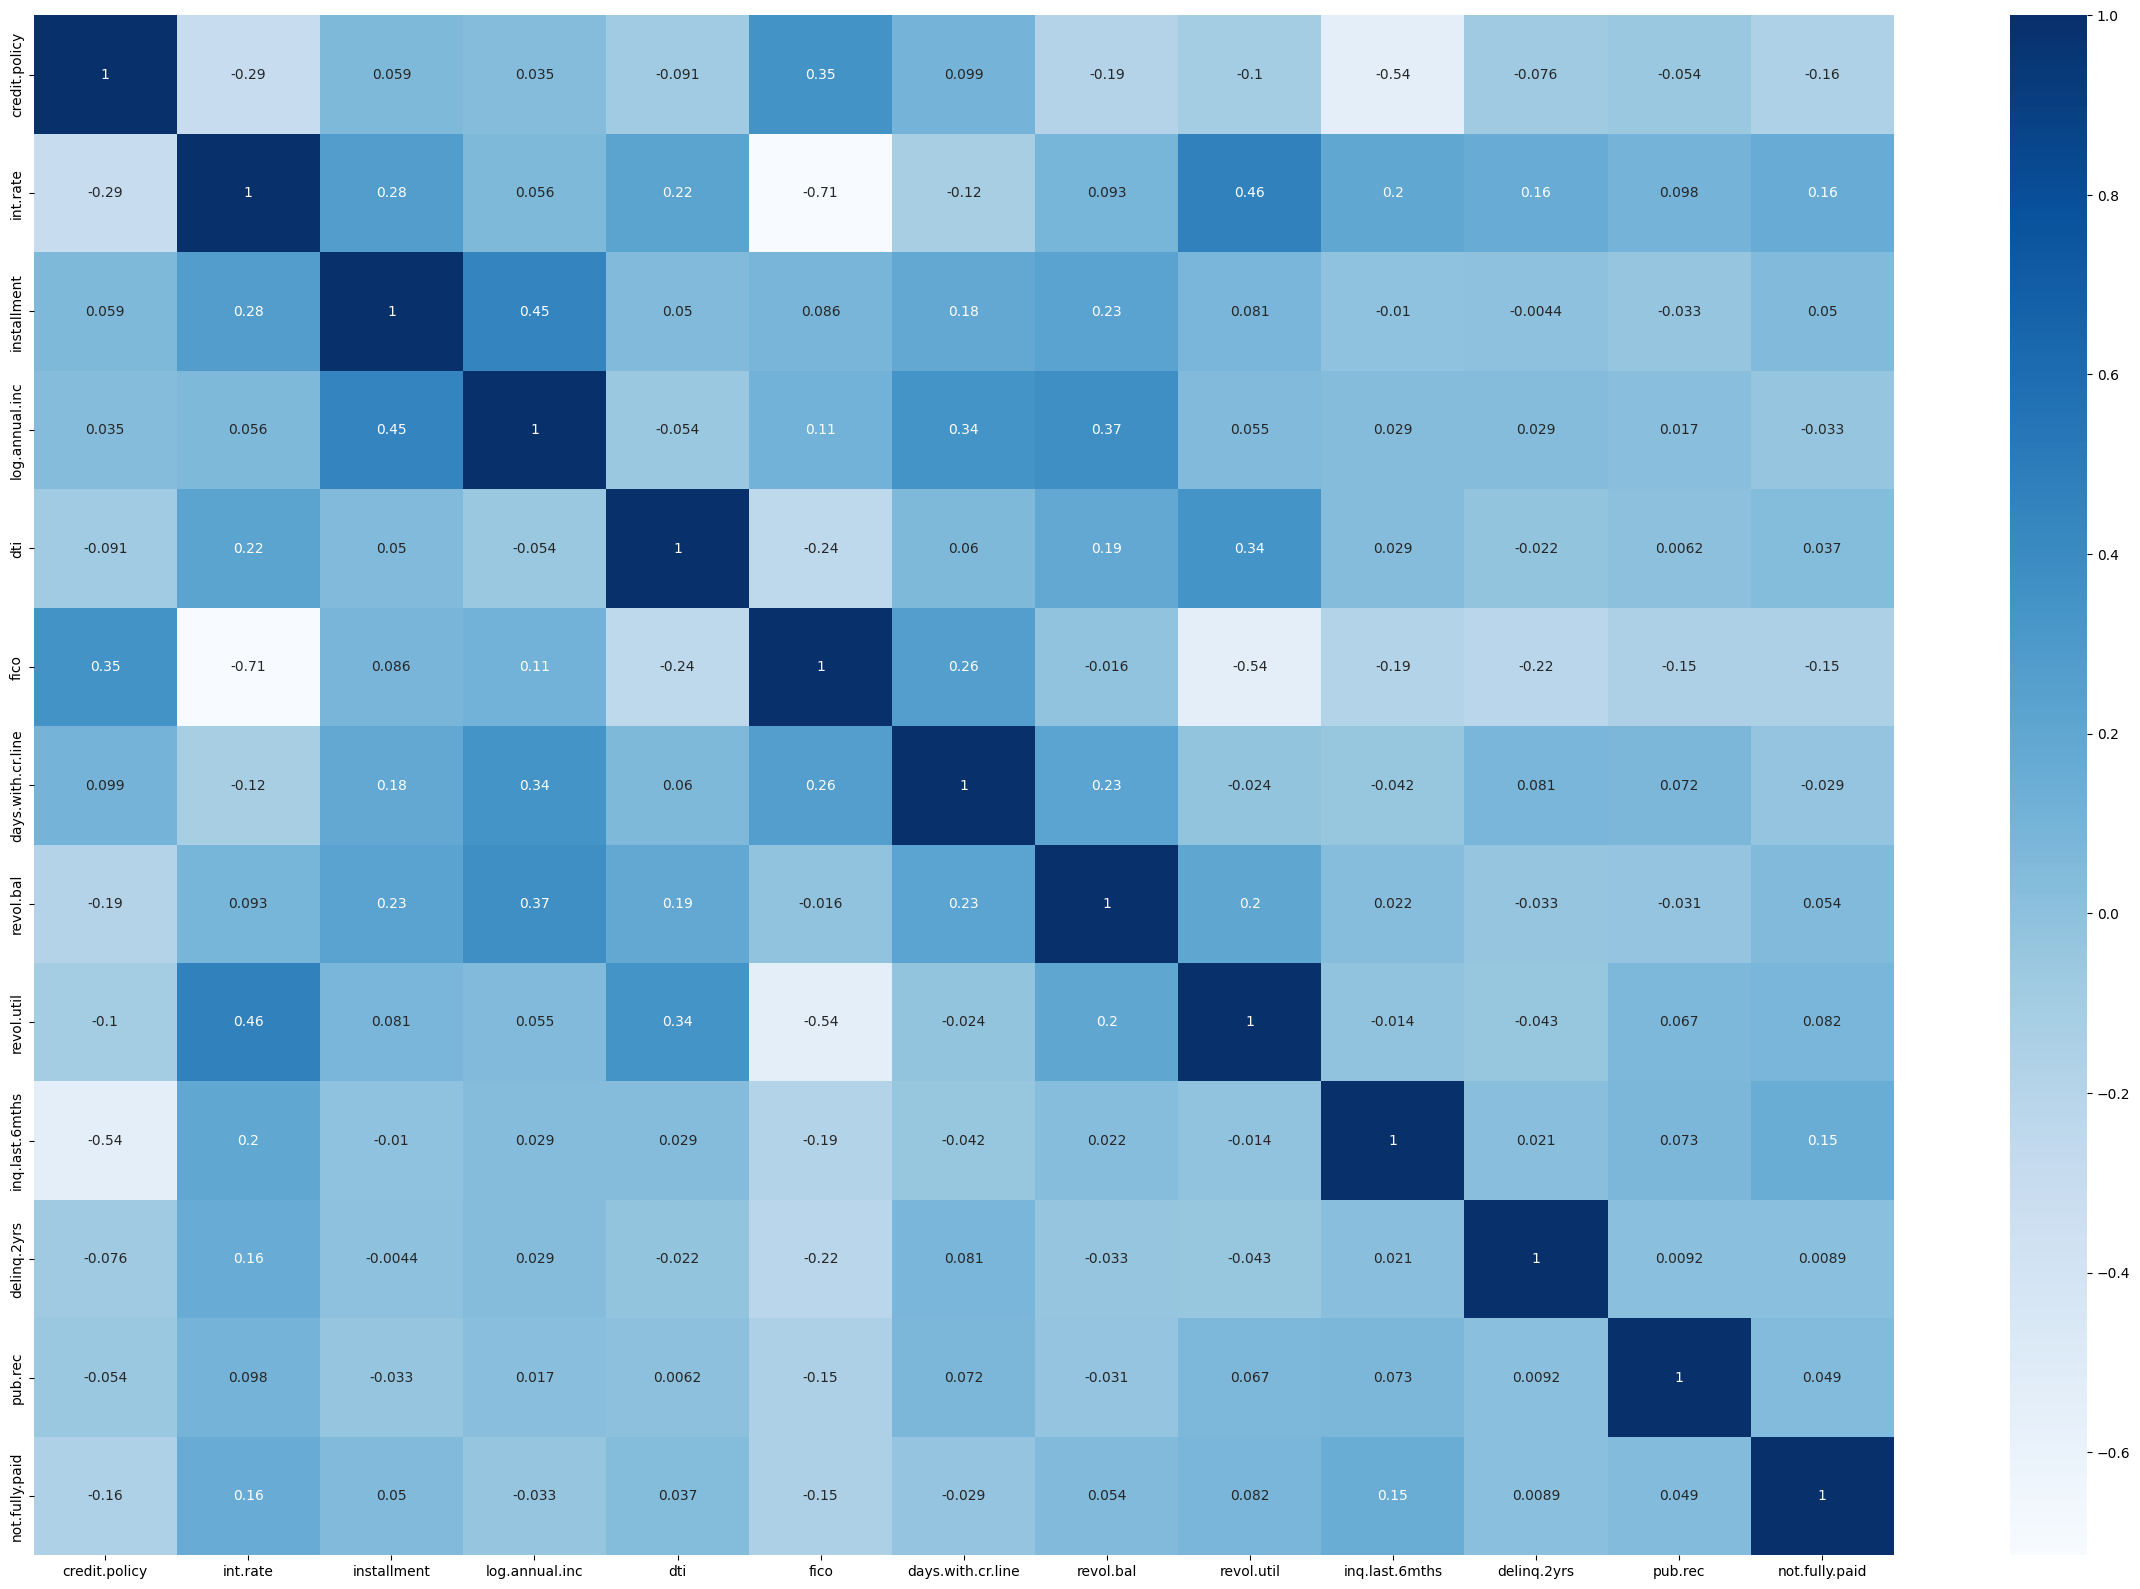

In [19]:
plt.figure(figsize=(30,20))
sns.heatmap(bank_data.corr(),cmap="Blues",annot=True)
plt.show()

In [20]:
X = data.drop(columns=["not.fully.paid",'purpose'],axis=1)
y = data["not.fully.paid"]

In [21]:
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [22]:
x_array = X.values
x_array

array([[1.0000e+00, 1.1890e-01, 8.2910e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0710e-01, 2.2822e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.3570e-01, 3.6686e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.0710e-01, 9.7810e+01, ..., 8.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.6000e-01, 3.5158e+02, ..., 5.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.3920e-01, 8.5343e+02, ..., 6.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [23]:
x_array.shape

(9578, 12)

In [24]:
X = x_array

In [25]:
X

array([[1.0000e+00, 1.1890e-01, 8.2910e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0710e-01, 2.2822e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.3570e-01, 3.6686e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.0710e-01, 9.7810e+01, ..., 8.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.6000e-01, 3.5158e+02, ..., 5.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.3920e-01, 8.5343e+02, ..., 6.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [26]:
X.shape

(9578, 12)

In [27]:
y=to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [28]:
y.shape

(9578, 2)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6704, 12), (2874, 12), (6704, 2), (2874, 2))

Building a multi-layer neaural network model

In [30]:
# Define the model
model = keras.Sequential()

# Add dense layers with dropout and batch normalization
model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output layer
model.add(Dense(2, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

compiling our neural network model

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])      # Compile the model.

In [32]:
history = model.fit(X_train, y_train, epochs=20,validation_split=0.1,verbose=1)             # fit the model.
history

Epoch 1/20
189/189 [==============================] - 3s 4ms/step - loss: 0.6492 - accuracy: 0.6920 - val_loss: 0.4427 - val_accuracy: 0.8301
Epoch 2/20
189/189 [==============================] - 1s 3ms/step - loss: 0.4688 - accuracy: 0.8177 - val_loss: 0.4345 - val_accuracy: 0.8331
Epoch 3/20
189/189 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.8356 - val_loss: 0.4374 - val_accuracy: 0.8316
Epoch 4/20
189/189 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.8346 - val_loss: 0.4266 - val_accuracy: 0.8301
Epoch 5/20
189/189 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.8367 - val_loss: 0.4280 - val_accuracy: 0.8301
Epoch 6/20
189/189 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8405 - val_loss: 0.4234 - val_accuracy: 0.8301
Epoch 7/20
189/189 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8420 - val_loss: 0.4234 - val_accuracy: 0.8301
Epoch 

Evaluating our neural network model

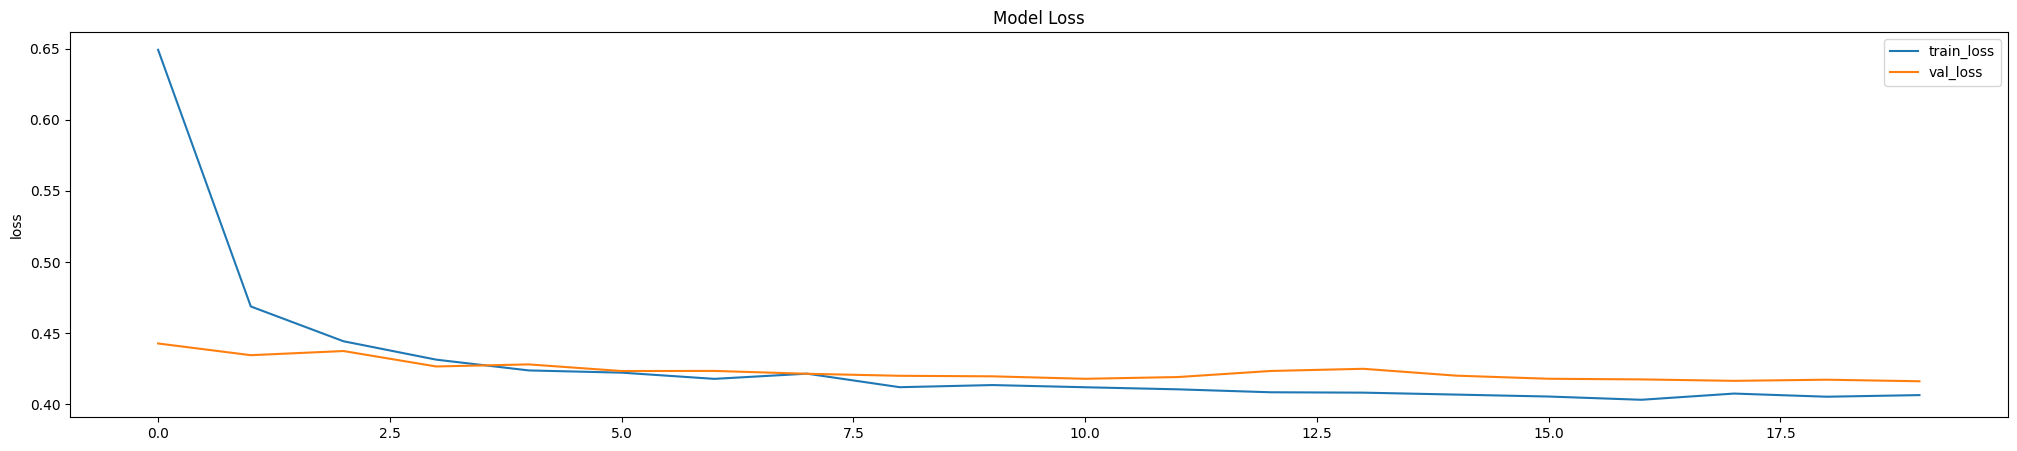

In [33]:
plt.figure(figsize=(25,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])

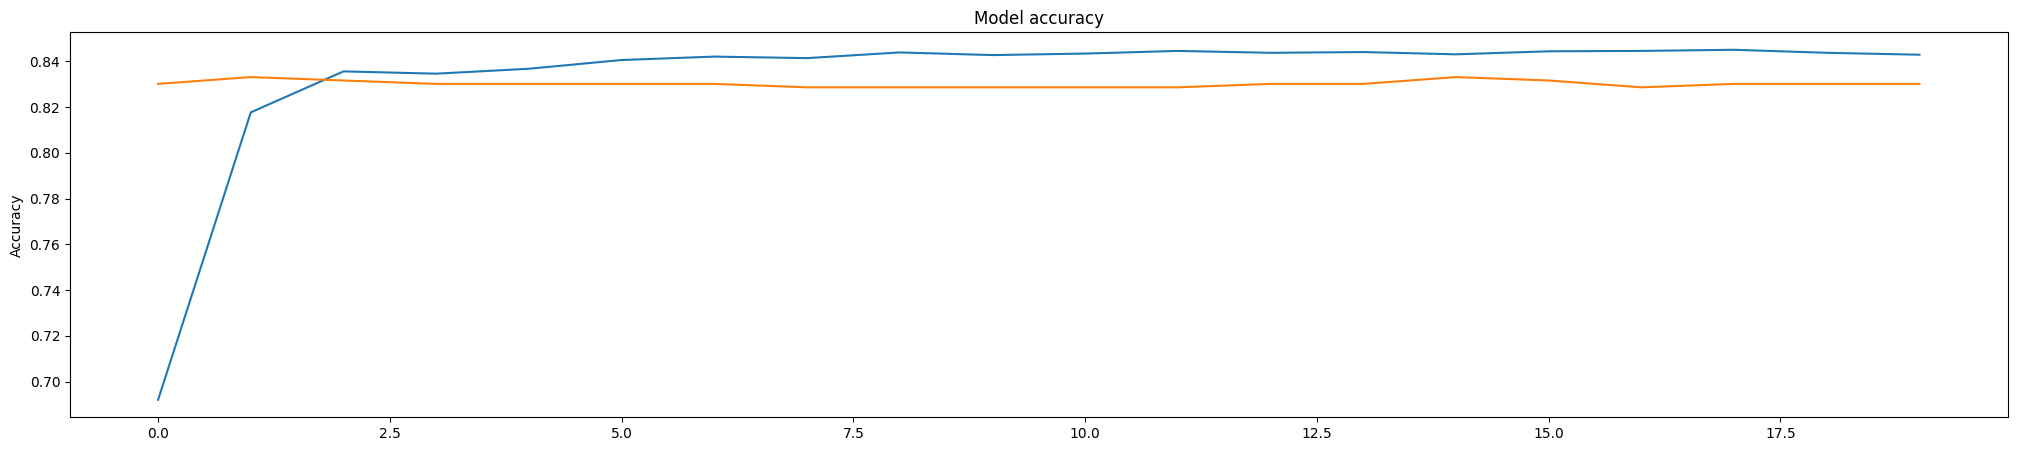

In [34]:
plt.figure(figsize=(25,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()

In [35]:
score = model.evaluate(X_train,y_train)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

210/210 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8438
Train loss: 0.3957231342792511
Train accuracy: 0.843824565410614


In [36]:
score = model.evaluate(X_test,y_test)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

90/90 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8316
Train loss: 0.4221356213092804
Train accuracy: 0.8315935730934143


In [37]:
X_test

array([[-2.04177648, -0.69946712, -0.3733946 , ...,  0.64708825,
        -0.30694224, -0.23131146],
       [ 0.48976958, -0.97837928, -1.39293949, ...,  0.19150333,
        -0.30694224, -0.23131146],
       [ 0.48976958,  0.44965101,  1.72625599, ...,  0.64708825,
        -0.30694224, -0.23131146],
       ...,
       [ 0.48976958, -0.03379674,  0.76611378, ...,  0.64708825,
        -0.30694224, -0.23131146],
       [ 0.48976958,  1.97437086, -0.33372847, ..., -0.26408159,
        -0.30694224, -0.23131146],
       [ 0.48976958,  0.86244102,  0.61425332, ..., -0.71966651,
        -0.30694224, -0.23131146]])

In [38]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [39]:
from sklearn.metrics import confusion_matrix

# Predictions on test data
y_pred = model.predict(X_test)

# Convert predictions to binary classes
y_pred_classes = np.argmax(y_pred,axis=0)
y_true_classes = np.argmax(y_test,axis=0)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


90/90 [==============================] - 0s 2ms/step
Confusion Matrix:
[[0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]]


In [40]:
y_pred_classes = np.argmax(y_pred,axis=1)
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_true_classes = np.argmax(y_pred,axis=1)
y_true_classes

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes)
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
